# Image Filtering

## Overview

### Learning Objectives

* Becoming familiar with the Pythonic and Object-oriented ITK interfaces
* Understand the image processing pipeline model used in ITK
* Gain familiarity with some of the filtering algorithms available in ITK

## Data and Process Objects

While **data objects** (e.g., [Image's](https://itk.org/Doxygen/html/classitk_1_1Image.html) and [Mesh's](https://itk.org/Doxygen/html/classitk_1_1Mesh.html)) are used to represent data, **process objects** are classes that operate on data objects and may produce new data objects.

Process objects are classed as sources, filter objects, or mappers.

**Sources** (such as readers) produce data, **filter** objects take in data and process it to produce new data, and **mappers** accept data for output either to a file or some other system. 

Sometimes the term *filter* is used broadly to refer to all three types.

![Data pipeline](data/data-pipeline.png)

Typically **data objects** and **process objects** are connected together using the `SetInput()` and `GetOutput()` methods.

Generation of new outputs and pixel data does not occur until the `Update()` method is called on the **end** of the pipeline (on the process object or the data object).

![Pipeline updates](data/pipeline-updates.png)

The **data** associated with multi-dimensional images **is large and becoming larger**. 

Any practical image analysis system must address this fact in order to be useful in applications with multi-dimensional images. ITK addresses this problem via its **data streaming** facility.

![Streaming](data/streaming.gif)

Streaming is performed by splitting the image into non-overlapping **regions** at the **end of the pipeline**. The *RequestedRegion* then propagates up the pipeline.



There are three named [ImageRegion](https://itk.org/Doxygen/html/classitk_1_1ImageRegion.html)'s encountered in ITK:

- *BufferedRegion*: The region of pixels stored in memory

- *LargestPossibleRegion*: The largest possible region of an image

- *RequestedRegion*: The region requested on a single processing pass when streaming. The BufferedRegion and LargestPossibleRegion are as large or larger than the RequestedRegion

For more information, see,

- The **Filtering** chapter of Book 2 of the [ITK Software Guide](https://itk.org/ItkSoftwareGuide.pdf).
- The **Data Processing Pipeline** section of the *System Overview* chapter of Book 1 of the ITK Software Guide.
- The **Data Representation** chapter of Book 1 of the ITK Software Guide.

## Tutorial

In [1]:
import itk

from packaging.version import parse
from importlib.metadata import version

if parse(version('itk')) < parse('5.3'):
    raise ValueError("ITK greater than version 5.3.0 is required for this notebook")

import numpy as np
from itkwidgets import view
from ipywidgets import interactive
import ipywidgets as widgets

We can monitor when a filter gets called by registering a command that gets called when [ProgressEvent's](https://itk.org/Doxygen/html/classitk_1_1EventObject.html) occur.


In [2]:
itk.auto_progress(2)

Start an image processing pipeline with a source, an `ImageFileReader`.

In [3]:
file_name = "data/PacMan.png"
reader = itk.ImageFileReader.New(FileName=file_name)

Loading ITKPyUtils... done


Next, let's create a smoothing filter. To connect the pipeline, specify the `Output` of the reader as the `Input` to the smoother.

In [4]:
smoother = itk.RecursiveGaussianImageFilter.New(Input=reader.GetOutput())

At this point, no output images have been generated.

We have configured the simple pipeline:

reader -> smoother

In [5]:
print(f"reader's Output: {reader.GetOutput()}")
print(f"smoother's Output: {smoother.GetOutput()}")

reader's Output: Image (0x55a08f40f220)
  RTTI typeinfo:   itk::Image<unsigned char, 2u>
  Reference Count: 3
  Modified Time: 284
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (0x55a08dc1f3c0) 
  Source output name: Primary
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 0
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [0, 0]
  BufferedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [0, 0]
  RequestedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [0, 0]
  Spacing: [1, 1]
  Origin: [0, 0]
  Direction: 
1 0
0 1

  IndexToPointMatrix: 
1 0
0 1

  PointToIndexMatrix: 
1 0
0 1

  Inverse Direction: 
1 0
0 1

  PixelContainer: 
    ImportImageContainer (0x55a09028ad50)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, unsigned char>
      Reference Count: 1
      Modified Time: 281
      Debug: Off
      Object Name: 
      Observers: 
      

To generate the filter outputs, we must call `Update()` on the filter at the end of the pipeline. In this case, it is the smoother.

In [6]:
smoother.Update()

print(f"reader's Output: {reader.GetOutput()}")
print(f"smoother's Output: {smoother.GetOutput()}")

reader's Output: Image (0x55a08f40f220)
  RTTI typeinfo:   itk::Image<unsigned char, 2u>
  Reference Count: 3
  Modified Time: 484
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (0x55a08dc1f3c0) 
  Source output name: Primary
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 294
  UpdateMTime: 485
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [128, 128]
  BufferedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [128, 128]
  RequestedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [128, 128]
  Spacing: [1, 1]
  Origin: [0, 0]
  Direction: 
1 0
0 1

  IndexToPointMatrix: 
1 0
0 1

  PointToIndexMatrix: 
1 0
0 1

  Inverse Direction: 
1 0
0 1

  PixelContainer: 
    ImportImageContainer (0x55a09028ad50)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, unsigned char>
      Reference Count: 1
      Modified Time: 482
      Debug: Off
      Object Name: 
      Ob

Running itkImageFileReaderIUC2... done
Running itkRecursiveGaussianImageFilterIUC2IUC2... 

Let's view the images.

Loading ITKBridgeNumPy... done



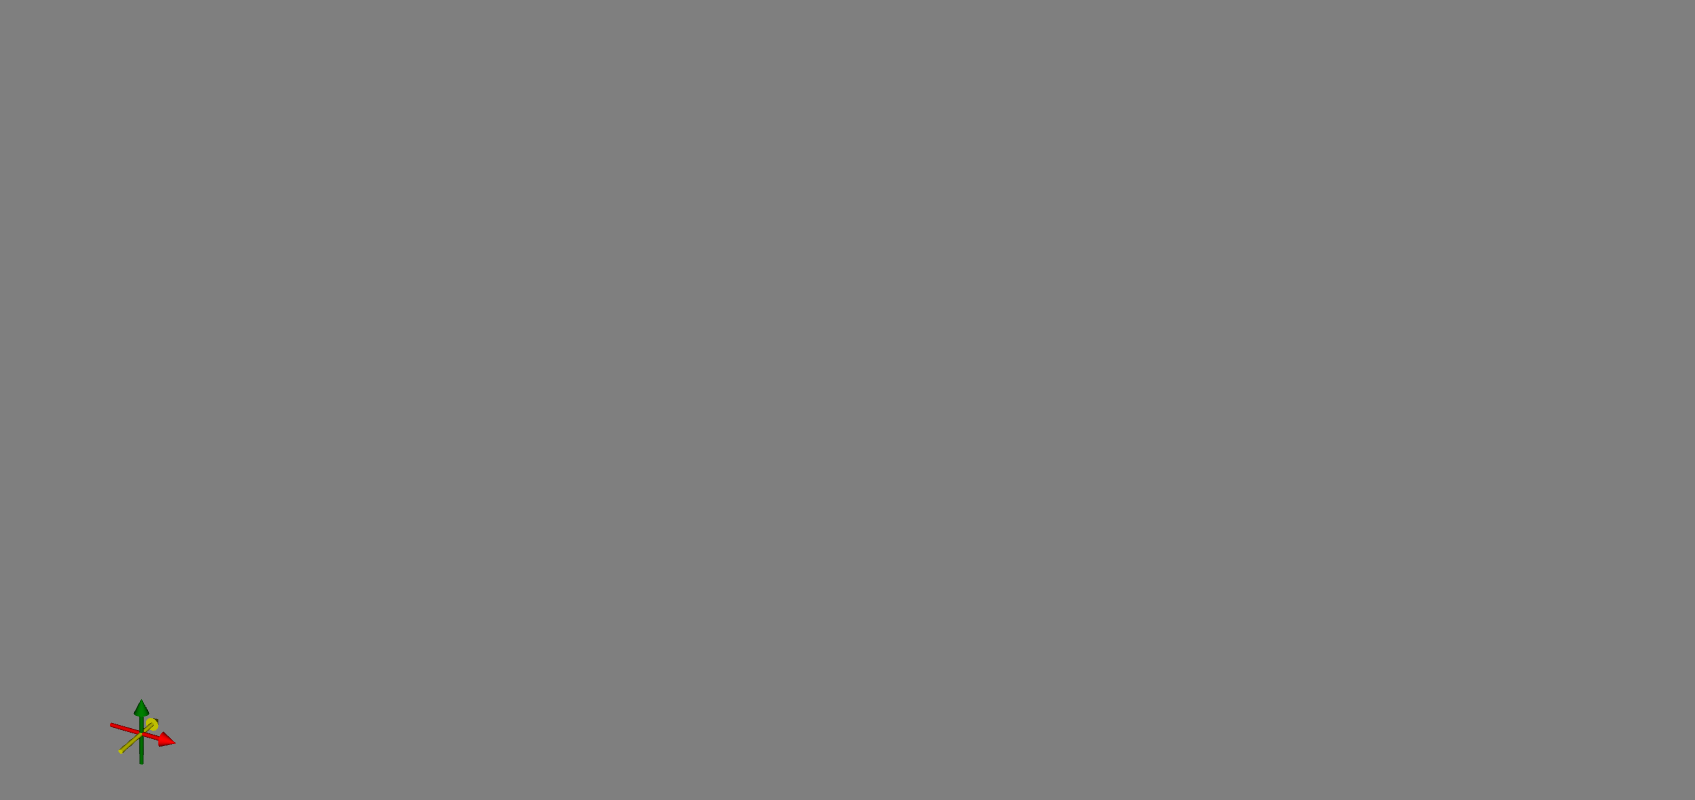
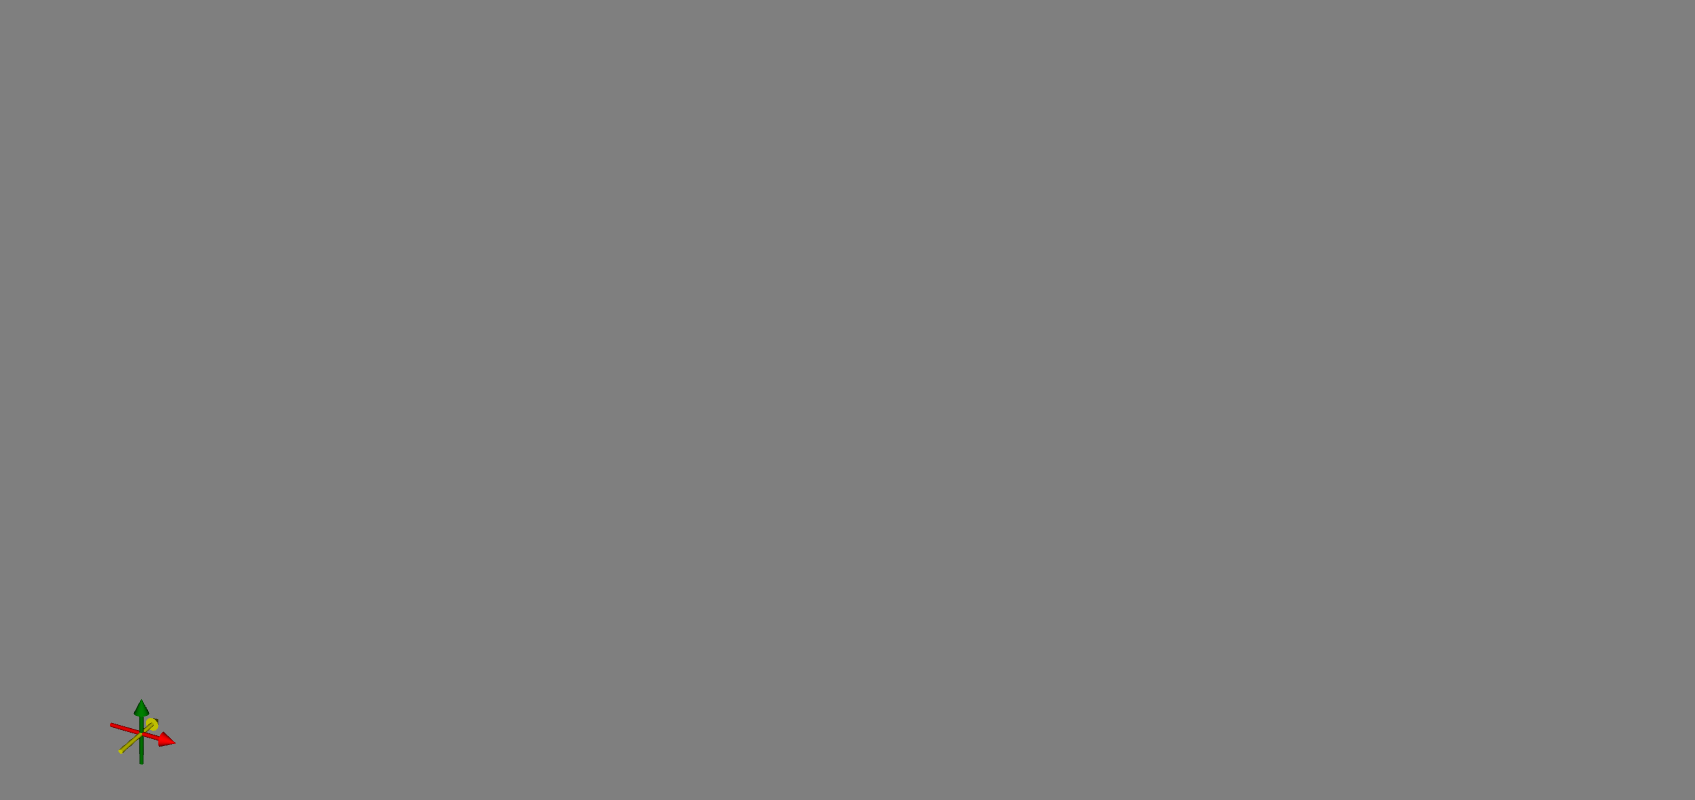

<IPython.core.display.Javascript object>

In [7]:
image = reader.GetOutput()
view(image, ui_collapsed=True)


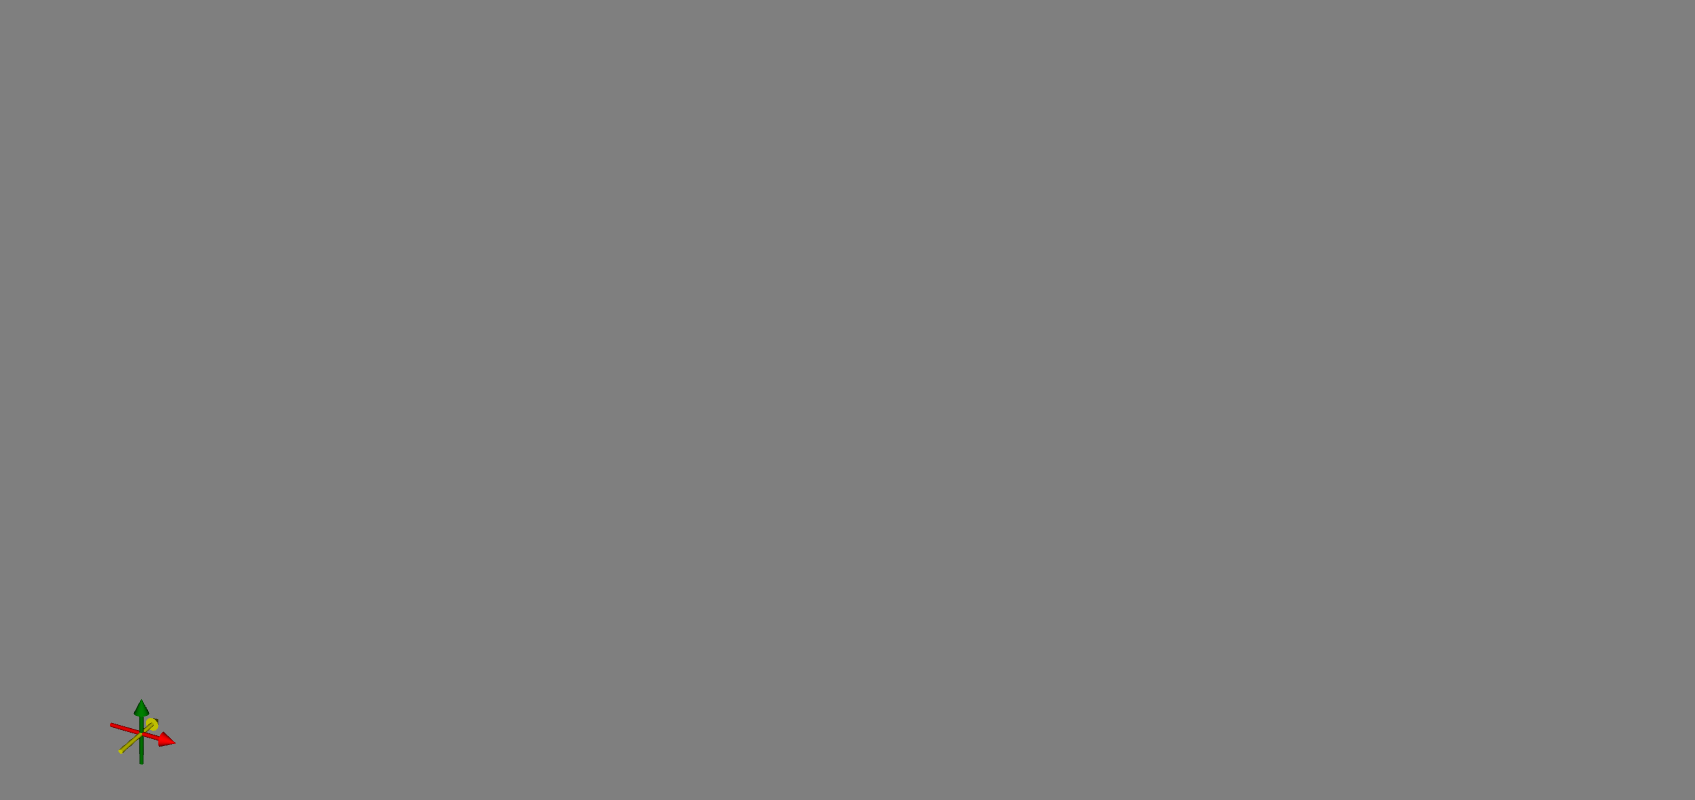
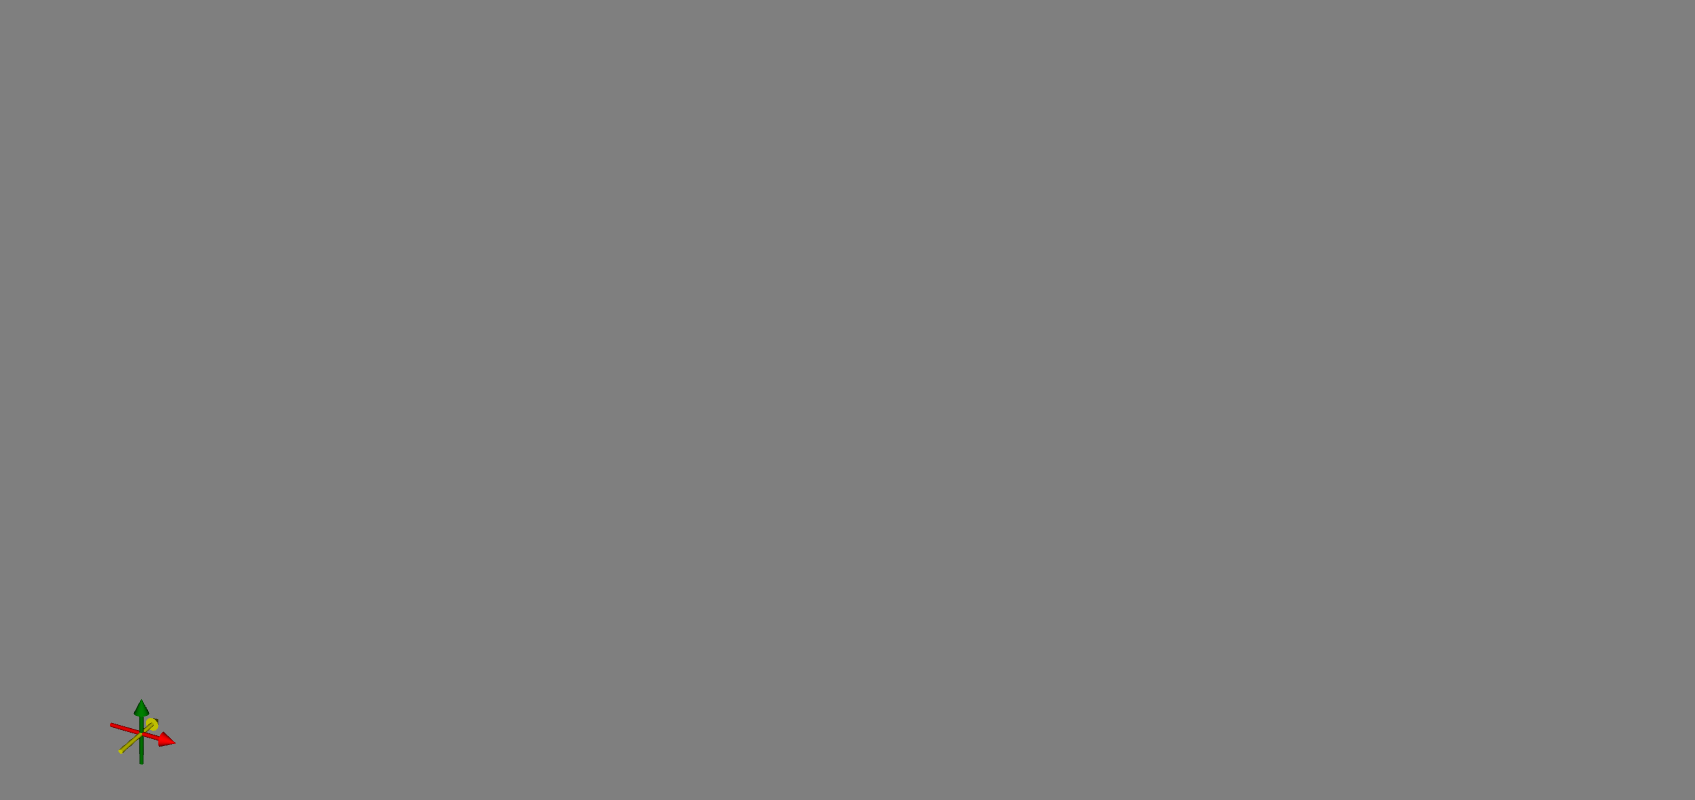

<IPython.core.display.Javascript object>

In [8]:
smoothed = smoother.GetOutput()
view(smoothed, ui_collapsed=True)

If we call `Update()` on the pipeline, the output pixel data is not needlessly generated because the pipeline is up-to-date.

In [9]:
smoother.Update()

However, if we change the amount of smoothing, new pixel data does need to be generated from the output of the smoother.

In [10]:
smoother.SetSigma(10.0)
smoother.Update()

Running itkRecursiveGaussianImageFilterIUC2IUC2... done



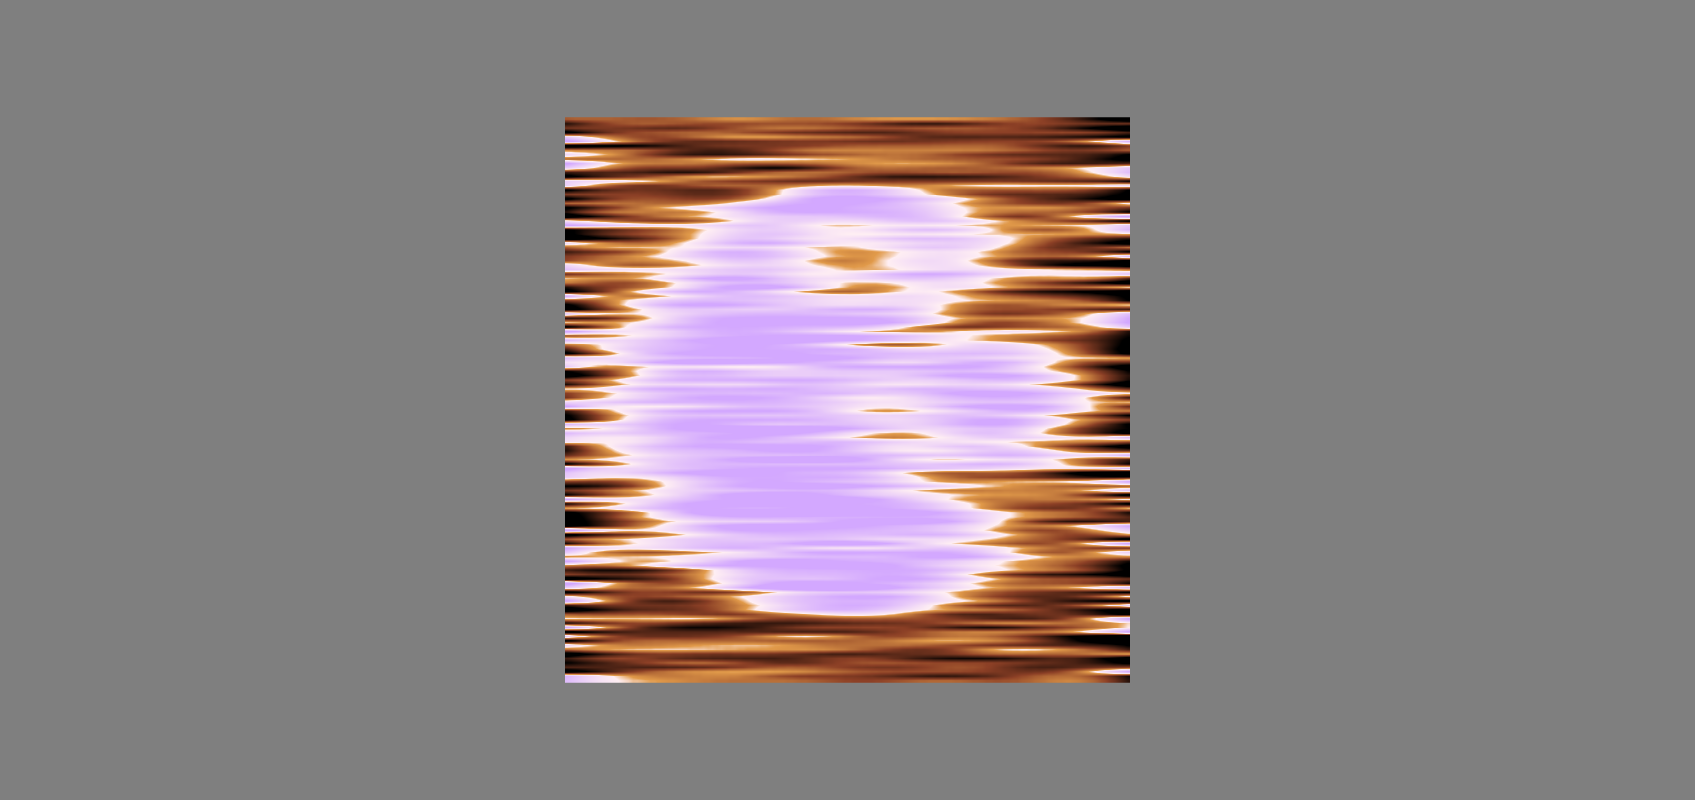
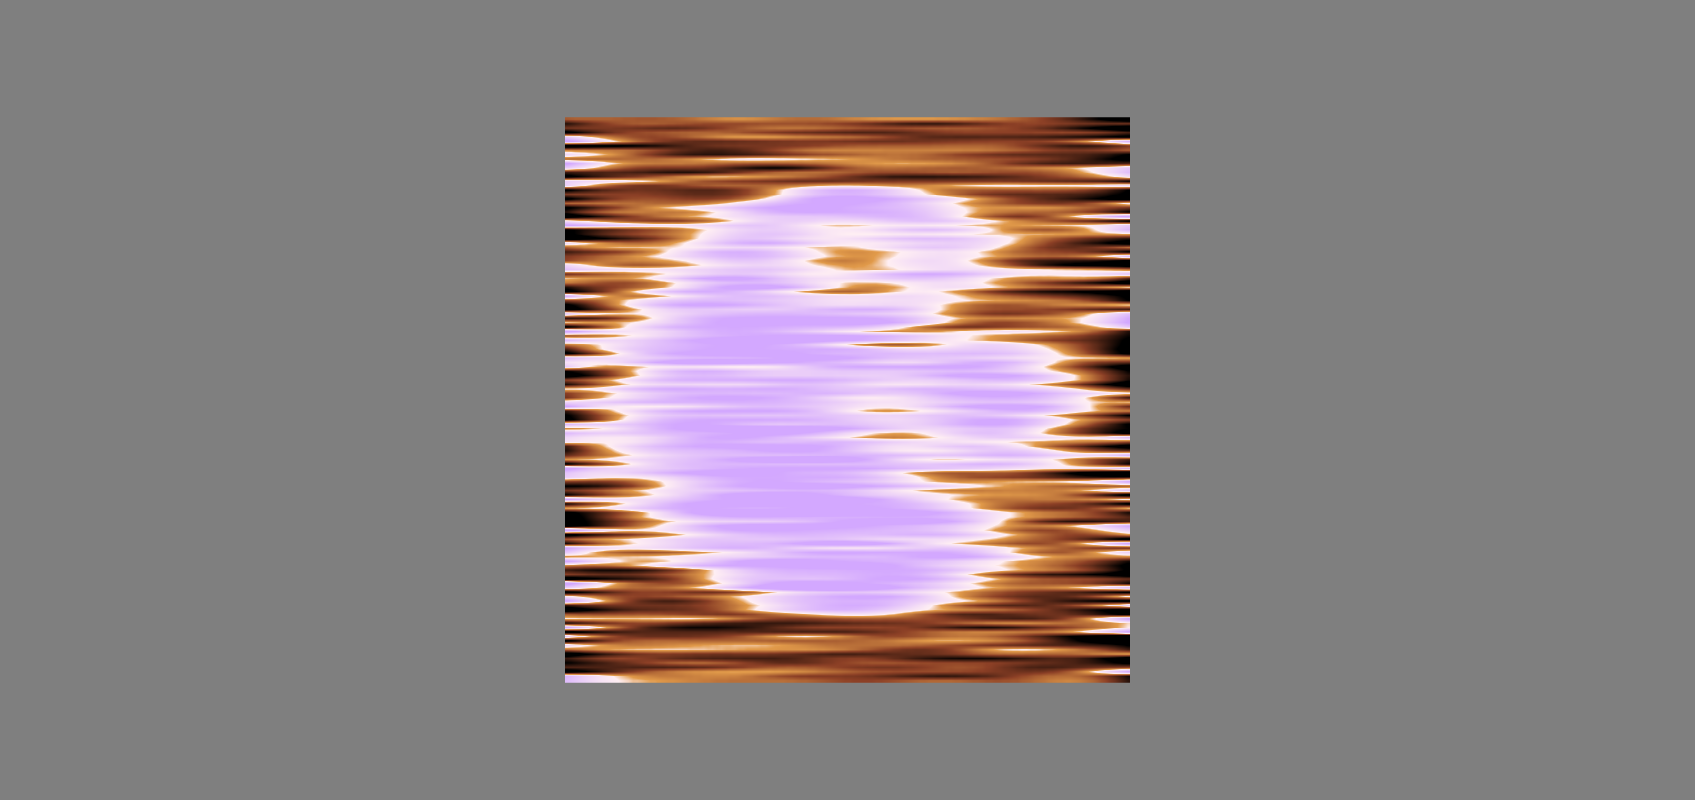

<IPython.core.display.Javascript object>

In [11]:
view(smoothed, ui_collapsed=True)

Note, however, that the reader does generate its output because it is up-to-date and upstream from the smoother.

If we artificially modify the reader, both the reader and the smoother need to regenerate their outputs.

In [12]:
reader.Modified()

smoother.Update()

Running itkImageFileReaderIUC2... done
Running itkRecursiveGaussianImageFilterIUC2IUC2... 

### Exercise 1: The effect of Sigma

Change the value of *Sigma* on the smoothing filter.

- How is the output effected?
- What are the units of Sigma?

In [13]:
# fileName = 'data/PacMan.png'
# reader = itk.ImageFileReader.New(FileName=fileName)
# smoother = itk.RecursiveGaussianImageFilter.New(Input=reader.GetOutput())
# smoother.SetSigma(XX)
# smoother.Update()
# view(smoother.GetOutput())

In [14]:
# %load solutions/3_Image_Filtering_Exercise1.py

### Exercise 2: Does setting a filter parameter to its current value cause regeneration of its output?

Call `smoother.SetSigma(smoother.GetSigma())` then `smoother.Update()`. 

- Is the output regenerated? 
- Is this expected / desirable?

In [15]:
# %load solutions/3_Image_Filtering_Exercise2.py

### Exercise 3: Find other image filtering algorithms

The classes in ITK are organized into **Modules**, and collections of Modules are organized into **Groups**. Examine the [Image Smoothing](https://itk.org/Doxygen/html/group__ITKSmoothing.html) Module and the [Filtering](https://itk.org/Doxygen/html/group__Group-Filtering.html) Group. Can any other smoothing or denoising classes be found? 

In [16]:
# %load solutions/3_Image_Filtering_Exercise3.py

The answer example demonstrates how to combine `ipywidgets` native [interactive](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html) function to quickly create widgets coupled with an [`itkwidgets`](https://github.com/InsightSoftwareConsortium/itkwidgets) viewer. This is an effective method to explore algorithm parameters.

### Enjoy ITK!